In [1]:
import numpy as np

# New function with sharp valleys and flat regions
def function(x):
    return np.sin(5 * x)  + (x ** 2) / 10

# Derivative of the new function
def derivative(x):
    return 5 * np.cos(5 * x)  + x / 5


In [2]:
def loss_x (x_1,x):
    return (x_1-x)**2
def gradient_descent(starting_point, learning_rate, n_iterations):
    x = starting_point
    x_history = [x]
    epsilon = 1e-3
    for _ in range(n_iterations):
        grad = derivative(x)
        x = x - learning_rate * grad
        x_history.append(x)
        if len(x_history) > 1 and loss_x(x_history[-1], x_history[-2]) < epsilon:
            break
    return x_history,len(x_history)

/tmp/ipykernel_36726/986996899.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  recent_point.set_data(xdata[-1], ydata[-1])


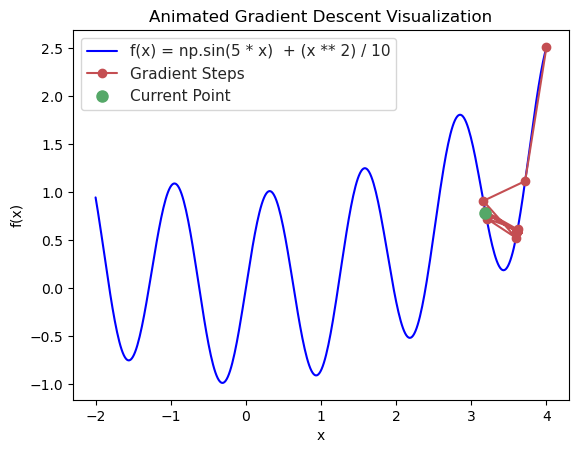

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns

# Settings for the animation
starting_point = 4
learning_rate = 0.1
n_iterations = 400
points,n_iterations_current = gradient_descent(starting_point, learning_rate, n_iterations)

# Create a figure and axes
fig, ax = plt.subplots()
sns.set(style="whitegrid")

# Generate data for the function's plot
x = np.linspace(-2, 4, 400)
y = function(x)
sns.lineplot(x=x, y=y, ax=ax, label='f(x) = np.sin(5 * x)  + (x ** 2) / 10', color='blue')

# Initialize the plot with the first point
line, = ax.plot([], [], 'ro-', label='Gradient Steps')
recent_point, = ax.plot([], [], 'go', markersize=8, label='Current Point')  # Current step

ax.legend()

def init():
    line.set_data([], [])
    recent_point.set_data([], [])
    return line,recent_point

def update(frame):
    xdata = [points[i] for i in range(frame + 1)]
    ydata = [function(x) for x in xdata]
    line.set_data(xdata[:-1], ydata[:-1])
    recent_point.set_data(xdata[-1], ydata[-1])  
    return line,recent_point


# Create and save the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, len(points)),
                    init_func=init, blit=True)
ani.save('gradient_descent.gif', writer='pillow', fps=60)

plt.title('Animated Gradient Descent Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()





Number of iterations: 401
point: [4, 3.715958969093304, 3.15972249102167, 3.5944751287746968, 3.2029246871942316, 3.6155397440472883, 3.1849206646787396, 3.609534840798125, 3.189666336417737, 3.6114981776523982, 3.1880797576874644, 3.6108722944579976, 3.1885818772882644, 3.6110736826685144, 3.18841993743451, 3.61100906738433, 3.1884718570426767, 3.61102981844342, 3.188455179186108, 3.6110231562654094, 3.1884605332414933, 3.6110252953782416, 3.1884588141023698, 3.611024608566301, 3.1884593660676126, 3.6110248290854248, 3.188459188844135, 3.611024758282156, 3.1884592457461887, 3.6110247810153675, 3.1884592274763155, 3.6110247737162875, 3.1884592333423263, 3.6110247760598444, 3.1884592314588933, 3.611024775307386, 3.188459232063617, 3.6110247755489815, 3.1884592318694547, 3.6110247754714107, 3.1884592319317955, 3.611024775496317, 3.1884592319117795, 3.6110247754883202, 3.188459231918206, 3.611024775490888, 3.188459231916142, 3.611024775490063, 3.188459231916806, 3.6110247754903284, 3.1884

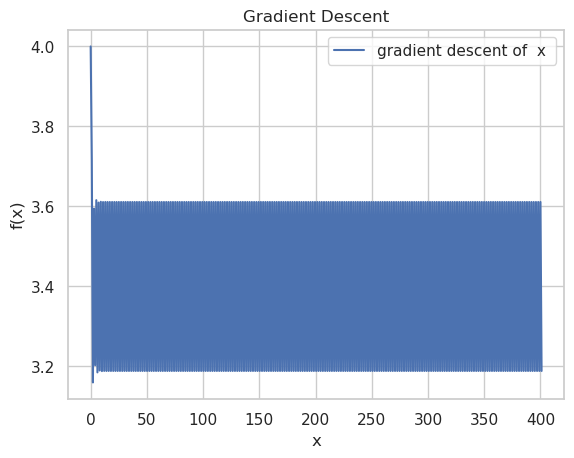

In [4]:
print(f"Number of iterations: {n_iterations_current}")
print(f"point: {points}")

# plot the function
x = np.linspace(0,401, 401)
y = points
plt.plot(x,y, label='gradient descent of  x ')
plt.title('Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()



# make other animation with momentum gradient

In [5]:
def loss_x (x_1,x):
    return (x_1-x)**2
def gradient_descent_with_momentum(starting_point, learning_rate, n_iterations):
    x = starting_point
    x_history = [x]
    beta = 0.9
    Vdw = 0
    epsilon = 1e-6
    for _ in range(n_iterations - 1):
        grad = derivative(x)
        Vdw = beta * Vdw + (1 - beta) * grad
        x = x - learning_rate * Vdw
        x_history.append(x)
        if len(x_history) > 1 and loss_x(x_history[-1], x_history[-2]) < epsilon:
            break
    return x_history,len(x_history)

43


/tmp/ipykernel_36726/1555280597.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  recent_point.set_data(xdata[-1], ydata[-1])


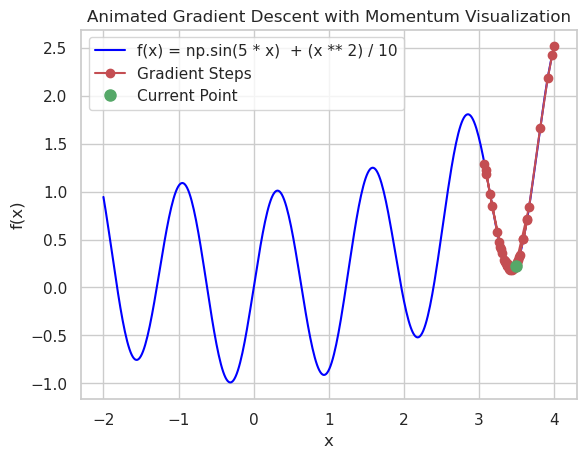

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns

# Settings for the animation
starting_point = 4
learning_rate = 0.1
n_iterations = 200
points,n_iterations_current = gradient_descent_with_momentum(starting_point, learning_rate, n_iterations)
print(len(points))

# Create a figure and axes
fig, ax = plt.subplots()
sns.set(style="whitegrid")

# Generate data for the function's plot
x = np.linspace(-2, 4, 400)
y = function(x)
sns.lineplot(x=x, y=y, ax=ax, label='f(x) = np.sin(5 * x)  + (x ** 2) / 10', color='blue')

# Initialize the plot with the first point
line, = ax.plot([], [], 'ro-', label='Gradient Steps')
recent_point, = ax.plot([], [], 'go', markersize=8, label='Current Point')  # Current step
ax.legend()

def init():
    line.set_data([], [])
    recent_point.set_data([], [])
    return line,recent_point

def update(frame):
    xdata = [points[i] for i in range(frame + 1)]
    ydata = [function(x) for x in xdata]
    line.set_data(xdata[:-1], ydata[:-1])
    recent_point.set_data(xdata[-1], ydata[-1])
    return line,recent_point

# Create and save the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, len(points)),
                    init_func=init, blit=True)
ani.save('gradient_descent_with_momentum.gif', writer='pillow', fps=60)

plt.title('Animated Gradient Descent with Momentum Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

Number of iterations: 43
point: [4, 3.9715958969093306, 3.9114292604844234, 3.8114599119829182, 3.6649396392283706, 3.4824717523335194, 3.304625606021198, 3.1722422472534886, 3.096166764520728, 3.070222336757415, 3.087581971550707, 3.145218311362223, 3.2407923649234354, 3.3643021246575247, 3.4908063723760794, 3.588959770587425, 3.639226078983083, 3.6374870018938705, 3.5892123540726297, 3.5076432904976134, 3.414388065360832, 3.3338969864222934, 3.2834008608107697, 3.269336876651152, 3.2902835594468307, 3.3393617473276307, 3.4043361285682012, 3.4687172288039707, 3.516483726887544, 3.537489915973918, 3.529450129100996, 3.4971450113484512, 3.4508015617169137, 3.4034283168685606, 3.3669177320579595, 3.3488098407165543, 3.3512947126604704, 3.371771642970366, 3.4038408570706773, 3.4387280071437707, 3.4674998266739356, 3.483524176300034, 3.484058269993503]


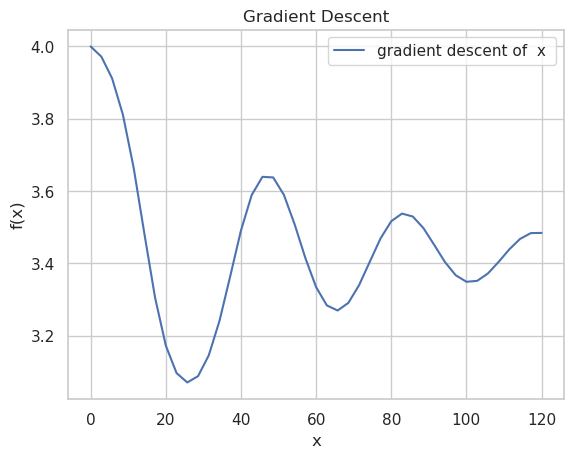

In [7]:
print(f"Number of iterations: {n_iterations_current}")
print(f"point: {points}")

# plot the function
x = np.linspace(0,120, 43)
y = points
plt.plot(x,y, label='gradient descent of  x ')
plt.title('Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()



# 2.3 Nesterov Momentum ***

In [8]:
def loss_x (x_1,x):
    return (x_1-x)**2
def gradient_descent_Nesterov_Momentum(starting_point, learning_rate, n_iterations):
    x = starting_point
    x_history = [x]
    beta = 0.9
    Vdw = 0
    epsilon = 1e-5
    
    for _ in range(n_iterations - 1):
        x_ehead = x - learning_rate * Vdw
        grad = derivative(x_ehead)
        Vdw = beta * Vdw + (1 - beta) * grad
        x = x - learning_rate * Vdw
        x_history.append(x)
        if len(x_history) > 1 and loss_x(x_history[-1], x_history[-2]) <= epsilon:
            break
    return x_history,len(x_history)

16


/tmp/ipykernel_36726/2567050225.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  recent_point.set_data(xdata[-1], ydata[-1])


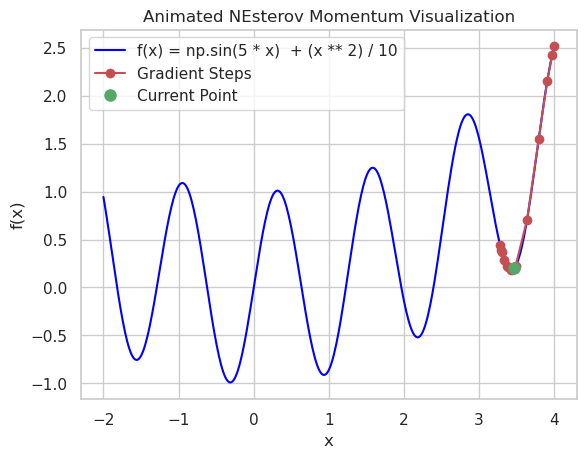

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns

# Settings for the animation
starting_point = 4
learning_rate = 0.1
n_iterations = 200
points,n_iterations_current = gradient_descent_Nesterov_Momentum(starting_point, learning_rate, n_iterations)
print(len(points))

# Create a figure and axes
fig, ax = plt.subplots()
sns.set(style="whitegrid")

# Generate data for the function's plot
x = np.linspace(-2, 4, 400)
y = function(x)
sns.lineplot(x=x, y=y, ax=ax, label='f(x) = np.sin(5 * x)  + (x ** 2) / 10', color='blue')

# Initialize the plot with the first point
line, = ax.plot([], [], 'ro-', label='Gradient Steps')
recent_point, = ax.plot([], [], 'go', markersize=8, label='Current Point')  # Current step
ax.legend()

def init():
    line.set_data([], [])
    recent_point.set_data([], [])
    return line,recent_point

def update(frame):
    xdata = [points[i] for i in range(frame + 1)]
    ydata = [function(x) for x in xdata]
    line.set_data(xdata[:-1], ydata[:-1])
    recent_point.set_data(xdata[-1], ydata[-1])
    return line,recent_point

# Create and save the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, len(points)),
                    init_func=init, blit=True)
ani.save('gradient_descent_nESTEROV_beta.gif', writer='pillow', fps=60)

plt.title('Animated NEsterov Momentum Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

# 2.4 AdaGrad

In [10]:

def gradient_descent_AdaGrad_Momentum(starting_point, learning_rate, n_iterations):
    x = starting_point
    x_history = [x]
    beta = 0.9
    Vdw = 0
    r = 0
    epsilon = 1e-10
    for _ in range(n_iterations - 1):
        grad = derivative(x)
        r += grad ** 2
        x = x - learning_rate * grad / (np.sqrt(r) + epsilon)
        x_history.append(x)
        # if len(x_history) > 1 and loss_x(x_history[-1], x_history[-2]) <= epsilon:
        #     break
    return x_history,len(x_history)

200


/tmp/ipykernel_36726/4123270137.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  recent_point.set_data(xdata[-1], ydata[-1])


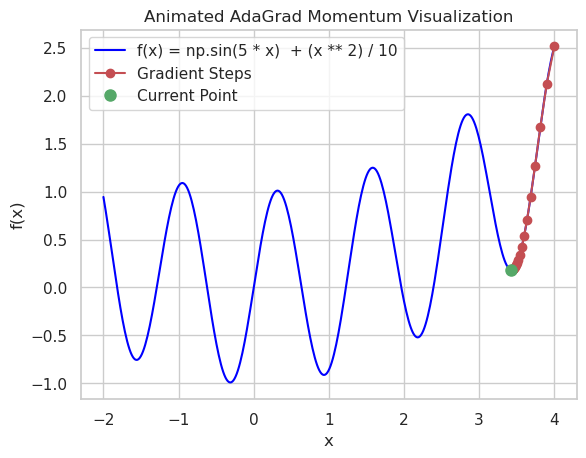

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns

# Settings for the animation
starting_point = 4
learning_rate = 0.1
n_iterations = 200
points,n_iterations_current = gradient_descent_AdaGrad_Momentum(starting_point, learning_rate, n_iterations)
print(len(points))

# Create a figure and axes
fig, ax = plt.subplots()
sns.set(style="whitegrid")

# Generate data for the function's plot
x = np.linspace(-2, 4, 400)
y = function(x)
sns.lineplot(x=x, y=y, ax=ax, label='f(x) = np.sin(5 * x)  + (x ** 2) / 10', color='blue')

# Initialize the plot with the first point
line, = ax.plot([], [], 'ro-', label='Gradient Steps')
recent_point, = ax.plot([], [], 'go', markersize=8, label='Current Point')  # Current step
ax.legend()

def init():
    line.set_data([], [])
    recent_point.set_data([], [])
    return line,recent_point

def update(frame):
    xdata = [points[i] for i in range(frame + 1)]
    ydata = [function(x) for x in xdata]
    line.set_data(xdata[:-1], ydata[:-1])
    recent_point.set_data(xdata[-1], ydata[-1])
    return line,recent_point

# Create and save the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, len(points)),
                    init_func=init, blit=True)
ani.save('gradient_descent_AdaGrad.gif', writer='pillow', fps=60)
plt.title('Animated AdaGrad Momentum Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

# RMSPROP

In [12]:

def gradient_descent_RMSPROP_Momentum(starting_point, learning_rate, n_iterations):
    x = starting_point
    x_history = [x]
    beta = 0.9
    Vdw = 0
    r = 0
    epsilon = 1e-6
    for _ in range(n_iterations - 1):
        grad = derivative(x)
        r = beta*r +(1-beta )*grad ** 2
        x = x - learning_rate * grad / (np.sqrt(r) + epsilon)
        x_history.append(x)
        # if len(x_history) > 1 and loss_x(x_history[-1], x_history[-2]) <= epsilon:
        #     break
    return x_history,len(x_history)

200


/tmp/ipykernel_36726/2039539569.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  recent_point.set_data(xdata[-1], ydata[-1])


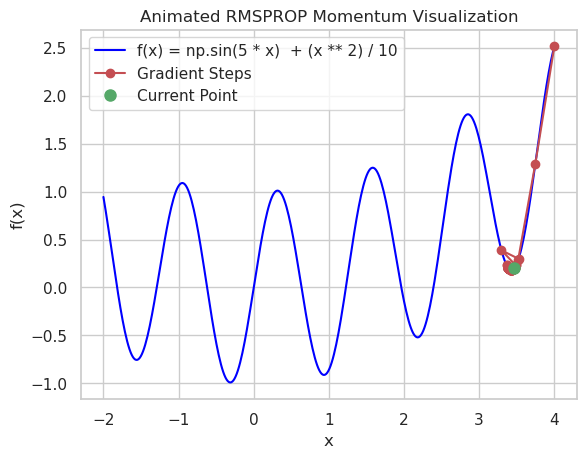

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns

# Settings for the animation
starting_point = 4
learning_rate = 0.08
n_iterations = 200
points,n_iterations_current = gradient_descent_RMSPROP_Momentum(starting_point, learning_rate, n_iterations)
print(len(points))

# Create a figure and axes
fig, ax = plt.subplots()
sns.set(style="whitegrid")

# Generate data for the function's plot
x = np.linspace(-2, 4, 400)
y = function(x)
sns.lineplot(x=x, y=y, ax=ax, label='f(x) = np.sin(5 * x)  + (x ** 2) / 10', color='blue')

# Initialize the plot with the first point
line, = ax.plot([], [], 'ro-', label='Gradient Steps')
recent_point, = ax.plot([], [], 'go', markersize=8, label='Current Point')  # Current step
ax.legend()

def init():
    line.set_data([], [])
    recent_point.set_data([], [])
    return line,recent_point

def update(frame):
    xdata = [points[i] for i in range(frame + 1)]
    ydata = [function(x) for x in xdata]
    line.set_data(xdata[:-1], ydata[:-1])
    recent_point.set_data(xdata[-1], ydata[-1])
    return line,recent_point

# Create and save the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, len(points)),
                    init_func=init, blit=True)
ani.save('gradient_descent_RMSPROP.gif', writer='pillow', fps=60)

plt.title('Animated RMSPROP Momentum Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

# ADAM

In [19]:

def gradient_descent_ADAM_Momentum(starting_point, learning_rate, n_iterations):
    x = starting_point
    x_history = [x]
    beta = 0.9
    Vdw = 0
    r = 0
    epsilon = 1e-8
    beta_1 = 0.9
    beta_2 = 0.999
    t = 5
    for _ in range(n_iterations - 1):
        grad = derivative(x)
        m = beta_1 * m + (1 - beta_1) * grad
        v = beta_2 * v + (1 - beta_2) * np.power(grad, 2)
        m_hat = m / (1 - np.power(beta_1, t))
        v_hat = v / (1 - np.power(beta_2, t))
        x = x - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        x_history.append(x)

    return x_history,len(x_history)

200


/tmp/ipykernel_36726/1741411261.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  recent_point.set_data(xdata[-1], ydata[-1])


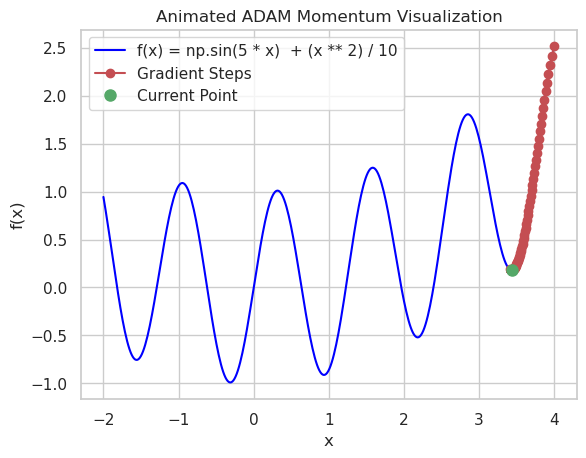

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns

# Settings for the animation
starting_point = 4
learning_rate = 0.01
n_iterations = 200
points,n_iterations_current = gradient_descent_RMSPROP_Momentum(starting_point, learning_rate, n_iterations)
print(len(points))

# Create a figure and axes
fig, ax = plt.subplots()
sns.set(style="whitegrid")

# Generate data for the function's plot
x = np.linspace(-2, 4, 400)
y = function(x)
sns.lineplot(x=x, y=y, ax=ax, label='f(x) = np.sin(5 * x)  + (x ** 2) / 10', color='blue')

# Initialize the plot with the first point
line, = ax.plot([], [], 'ro-', label='Gradient Steps')
recent_point, = ax.plot([], [], 'go', markersize=8, label='Current Point')  # Current step
ax.legend()

def init():
    line.set_data([], [])
    recent_point.set_data([], [])
    return line,recent_point

def update(frame):
    xdata = [points[i] for i in range(frame + 1)]
    ydata = [function(x) for x in xdata]
    line.set_data(xdata[:-1], ydata[:-1])
    recent_point.set_data(xdata[-1], ydata[-1])
    return line,recent_point

# Create and save the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, len(points)),
                    init_func=init, blit=True)
ani.save('gradient_descent_ADAM.gif', writer='pillow', fps=60)

plt.title('Animated ADAM Momentum Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()